# Fire Incidents

**Intro**: The metric for our group was "The Best Neighborhood for New Families to Avoid."

The submetric I chose to analyze was the fire incidents in the city of Pittsburgh.

I wanted to see where fires were most commons as they can be indicators of building saftey, alarm quality and maintenance, as well as overal safety of the area. 

I will mainly focus on the types of fire alarms and the frequency of fire alarms in Pittsburgh

## **Most Common Fire Type**

In [ ]:
import pandas as pd
import numpy as np
import math 
%matplotlib inline
import matplotlib.pyplot as plt

#/////////////////////////////////////////////////////////

raw_dataset = pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")
fire_incidents = pd.DataFrame(raw_dataset)

Above, I am importing the necessary libraries, reading the dataset, and initializing a variable with the main DataFrame.

Below, I am filtering just the addresses in the city of Pittsburgh, which allows me to used the 'neighborhood' column of the data set more effectively. I then created a data set that displays the frequency of each type of fire alarm. 

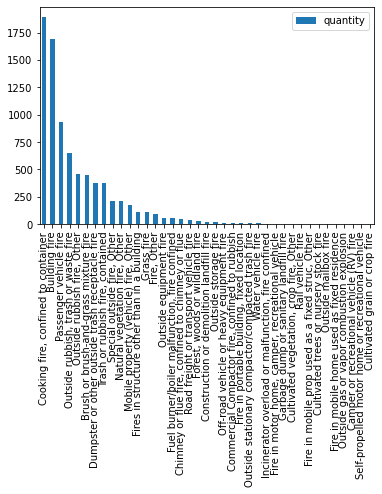

In [2]:
idx = 0
for town in fire_incidents['address']:
    if not('PITTSBURGH' in town):
        fire_incidents = fire_incidents.drop(idx)
    idx = idx + 1
fire_incidents.index = range(len(fire_incidents))

fire_types = pd.DataFrame({"quantity" : pd.Series(fire_incidents['type_description'].value_counts())})
fire_types.plot(kind="bar")

Cooking fires are the most frequent alarm, which is already a bad sign for new families, who rely on a stable and safe kitchen for food prep.

Below, I am selecting only the neighborhoods that had a cook fire alarm. 

In [80]:
type_procesing = pd.DataFrame({"cook_fires" : pd.Series(fire_incidents['type_description']), 'neighborhood': pd.Series(fire_incidents['neighborhood'])})
idx = 0
for incident in type_procesing['cook_fires']:
    if not('Cooking fire, confined to container' in incident):
        type_procesing = type_procesing.drop(idx)
    idx = idx + 1
type_procesing.index = range(len(type_procesing))
type_procesing.head(5)

,cook_fires,neighborhood
0,"Cooking fire, confined to container",Allegheny Center
1,"Cooking fire, confined to container",Squirrel Hill South
2,"Cooking fire, confined to container",Homewood South
3,"Cooking fire, confined to container",Strip District
4,"Cooking fire, confined to container",Garfield


Then, I will find the top five neighborhoods with the largest amounts of cook fire alarms

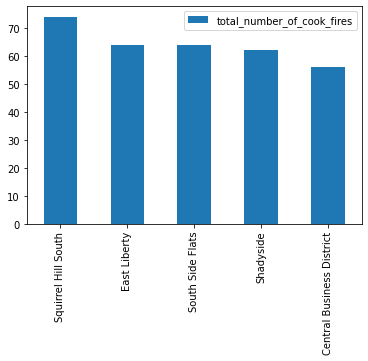

In [101]:
cook_fires_dict = {}
for town in type_procesing['neighborhood']:
    if not pd.isna(town):
        if town not in cook_fires_dict:
            cook_fires_dict[town] = 1
        else:
            cook_fires_dict[town] += 1
cook_fire_freq = pd.Series(cook_fires_dict).to_frame('total_number_of_cook_fires')
cook_fire_freq = cook_fire_freq.sort_values(axis = 0, by = 'total_number_of_cook_fires', ascending = False)
cook_fire_freq.head(5).plot(kind = 'bar')

## **Number of Alarms Per Neighborhood**

Next, I will look at the total amount of alarms per neighborhood. Below, I am initializing a dataset with just the alarms and neighborhood columns, before grouping the data by neighborhood

In [28]:
alarm_dict = {'alarms' : pd.Series(fire_incidents['alarms']), 'neighborhood': pd.Series(fire_incidents['neighborhood'])}
alarms_per_neighborhood = pd.DataFrame(alarm_dict)
alarm_counts = alarms_per_neighborhood.groupby('neighborhood', axis=0).count()

The next cell takes the alarm counts and put them in order by frequency. 

In [4]:
alarm_arr = []
for num in alarm_counts['alarms']:
    alarm_arr.append(num)
alarm_arr.sort()

Then, I reassemble the neighborhoods and their corresponding alarm counts by utilizing a dicitonary. I finally use that dictionary to construct a final data frame with the neighborhoods with the most reported alarms

In [5]:
top_five = {}
top_five_names = []
alarm_idx = len(alarm_arr) - 1
limit = alarm_idx - 8

while alarm_idx > limit:
    name = alarm_counts[alarm_counts['alarms'] == alarm_arr[alarm_idx]].index[0]
    top_five_names.append(name)
    top_five[name] = alarm_arr[alarm_idx]
    alarm_idx = alarm_idx - 1

In [6]:
top_five_alarms = pd.Series(top_five).to_frame('total_number_of_alarms')
print(top_five_alarms)

                           total_number_of_alarms
Carrick                                       263
Central Business District                     233
South Side Flats                              225
Hazelwood                                     217
East Liberty                                  188
Mount Washington                              184
Lincoln-Lemington-Belmar                      177


## **Breakdown of Fire Types per Top Five Neighborhoods**

Finally, I will take the neighborhoods with the most alarms, and find out which types of alarms are most frequent with each neighborhood. I began by creating a data frame with all the necessary columns.

In [9]:
types_dict = {'alarms' : pd.Series(fire_incidents['alarms']), 
              'neighborhood': pd.Series(fire_incidents['neighborhood']),
             'types_of_alarms' : pd.Series(fire_incidents['type_description'])}
types = pd.DataFrame(types_dict)

The functions below filter the types of alarms for each neighborhood and eliminate any instances of 0 alarms

In [10]:
def types_per_town(town_name,types):
    town_dict = {}
    idx = 0
    for town in types['neighborhood']:
        if town == town_name:
            if types['types_of_alarms'][idx] not in town_dict:
                town_dict[types['types_of_alarms'][idx]] = types['alarms'][idx]
            else:
                town_dict[types['types_of_alarms'][idx]] += types['alarms'][idx]
        idx = idx + 1
    return town_dict

def del_zero_alarms(town_dict):
    to_del = []
    for k,v in town_dict.items():
        if v == 0:
            to_del.append(k)
    for n in to_del:
        town_dict.pop(n)
    return town_dict

Finally, we have they type and ferquency of alarms for the top eight neighbothoods with the most fire alarm reports. 

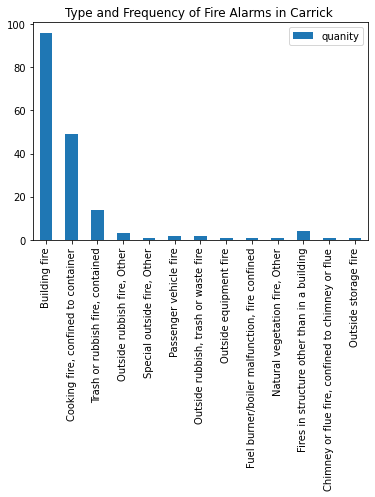

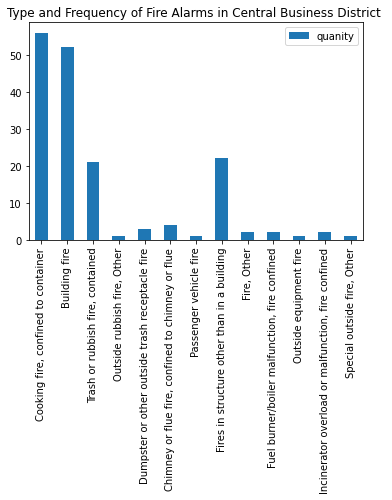

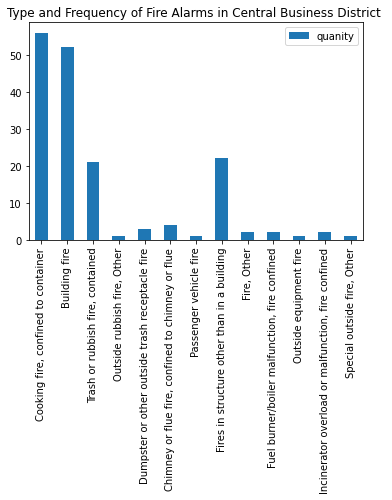

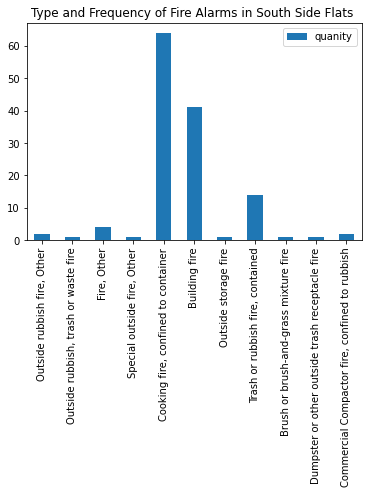

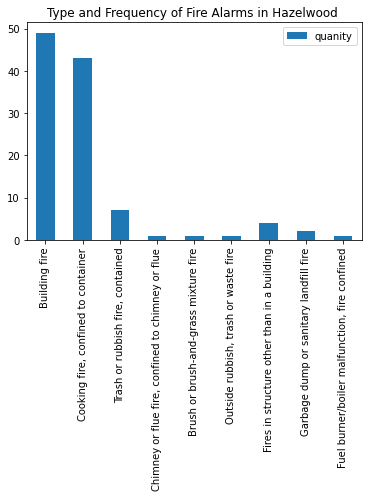

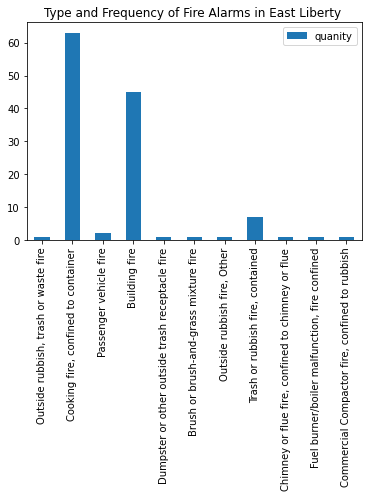

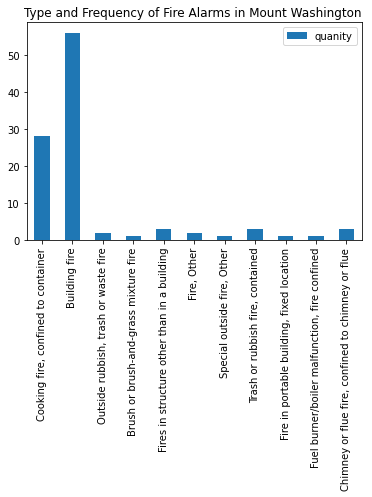

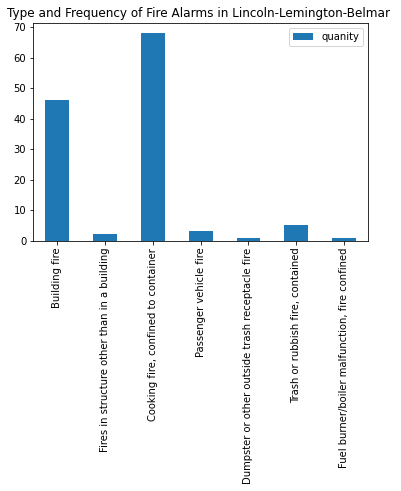

In [11]:
for n in top_five_names:
    town_dict = del_zero_alarms(types_per_town(n, types))
    town = pd.Series(town_dict).to_frame('quanity')
    town.plot(kind = 'bar', title = f"Type and Frequency of Fire Alarms in {n} ")
    #print(f"Total number of alarms in {n} is {top_five_alarms['total_number_of_alarms'][n]}")